In [1]:
import types
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import requests
from pandas.io.json import json_normalize
import json
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
#car parking area data
url = "https://api.ibb.gov.tr/ispark/Park"
df = pd.read_json(url) 
df.head()

,ParkID,ParkAdi,Latitude,Longitude,Kapasitesi,BosKapasite,ParkTipi,Ilce,Distance,UcretsizParklanmaDk
0,395,Yeşil Vadi Sokak 4,40.967072,29.105824,40,40,YOL ÜSTÜ,ATAŞEHİR,0.372,15
1,1189,İçerenköy Açık Otoparkı 1,40.976597,29.104545,600,600,AÇIK OTOPARK,ATAŞEHİR,0.696,15
2,2151,Bostancı Vergi Dairesi Açık Otoparkı,40.962531,29.108000,105,105,AÇIK OTOPARK,ATAŞEHİR,0.907,0
3,2150,Bostancı Vergi Dairesi Açık Otoparkı,40.962510,29.108060,105,0,AÇIK OTOPARK,ATAŞEHİR,0.911,0
4,1176,Kozyatağı Sebze-Meyve Hali,40.978484,29.102947,1500,1500,AÇIK OTOPARK,ATAŞEHİR,0.918,0


In [3]:
#data of towns and neighborhoods of Istanbul
df2 = pd.read_excel("il_ilce_semt.xls")
df2.head()

,ILCE,SEMT_ADI_BUYUK,POSTA_KODU
0,BAKIRKÖY,ZEYTİNLİK,34140.0
1,BAKIRKÖY,CEVİZLİK,34142.0
2,BAKIRKÖY,KARTALTEPE,34144.0
3,BAKIRKÖY,ZUHURATBABA,34147.0
4,BAKIRKÖY,YEŞİLKÖY,34149.0


In [4]:
#drop the row with Null postal code
print (df2[df2['SEMT_ADI_BUYUK'] == 'REŞADİYE'])
df2 = df2.dropna()

         ILCE SEMT_ADI_BUYUK  POSTA_KODU
217  ÜMRANİYE       REŞADİYE         NaN


In [5]:
print (df2[df2['SEMT_ADI_BUYUK'] == 'REŞADİYE'])

Empty DataFrame
Columns: [ILCE, SEMT_ADI_BUYUK, POSTA_KODU]
Index: []


In [6]:
# type casting for postal code column
df2 = df2.astype({'POSTA_KODU': 'int32'})
df2.head()

,ILCE,SEMT_ADI_BUYUK,POSTA_KODU
0,BAKIRKÖY,ZEYTİNLİK,34140
1,BAKIRKÖY,CEVİZLİK,34142
2,BAKIRKÖY,KARTALTEPE,34144
3,BAKIRKÖY,ZUHURATBABA,34147
4,BAKIRKÖY,YEŞİLKÖY,34149


In [7]:
address = 'Istanbul'

geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Istanbul are 41.0096334, 28.9651646.


In [8]:
ist_map = folium.Map(location=[latitude, longitude], zoom_start = 10)

# add the car parking areas in Istanbul as markers to map
for lat, lng, borough, park in zip(df['Latitude'], df['Longitude'], df['Ilce'], df['ParkAdi']):
    label = '{}, {}'.format(park, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(ist_map)  
    
ist_map

In [9]:
df.groupby('Ilce').count()

,ParkID,ParkAdi,Latitude,Longitude,Kapasitesi,BosKapasite,ParkTipi,Distance,UcretsizParklanmaDk
Ilce,,,,,,,,,
ARNAVUTKÖY,1,1,1,1,1,1,1,1,1
ATAŞEHİR,18,18,18,18,18,18,18,18,18
AVCILAR,7,7,7,7,7,7,7,7,7
BAHÇELİEVLER,10,10,10,10,10,10,10,10,10
BAKIRKÖY,40,40,40,40,40,40,40,40,40
BAYRAMPAŞA,11,11,11,11,11,11,11,11,11
BAĞCILAR,3,3,3,3,3,3,3,3,3
BAŞAKŞEHİR,4,4,4,4,4,4,4,4,4
BEYKOZ,12,12,12,12,12,12,12,12,12


In [10]:
kadikoy_data = df[df['Ilce'] == 'KADIKÖY'].reset_index(drop=True)
kadikoy_data.head()

,ParkID,ParkAdi,Latitude,Longitude,Kapasitesi,BosKapasite,ParkTipi,Ilce,Distance,UcretsizParklanmaDk
0,1208,Bostancı İdo ve Adalar İskelesi Önü Taksi Durağı,40.952526,29.093790,16,16,TAKSİ PARK,KADIKÖY,2.180,0
1,1456,Bostancı Sahil-Cep Açık Otoparkı,40.954523,29.088487,195,76,AÇIK OTOPARK,KADIKÖY,2.224,15
2,1455,Bostancı Açık,40.952291,29.090255,375,21,AÇIK OTOPARK,KADIKÖY,2.344,15
3,458,Kazım Özalp Sokak 8,40.963544,29.077394,40,29,YOL ÜSTÜ,KADIKÖY,2.421,15
4,1753,Optimum AVM Önü Taksi Durağı,40.988228,29.085491,5,5,TAKSİ PARK,KADIKÖY,2.564,0


In [86]:
kadikoy_map = folium.Map(location=[latitude, longitude], zoom_start = 12.4)

# add the car parking areas in Kadikoy as markers to map
for lat, lng, borough, park in zip(kadikoy_data['Latitude'], kadikoy_data['Longitude'], kadikoy_data['Ilce'], kadikoy_data['ParkAdi']):
    label = '{}, {}'.format(park, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(kadikoy_map)  
    
kadikoy_map

In [121]:
#format the name of one neighborhood and add 2 new column to use in the future
kadikoy_data2 = df2[df2['ILCE'] == 'KADIKÖY'].reset_index(drop=True)
kadikoy_data2['SEMT_ADI_BUYUK'].values[12] = '19 MAYIS'
kadikoy_data2['LATITUDE'] = np.nan
kadikoy_data2['LONGITUDE']=np.nan
kadikoy_data2

,ILCE,SEMT_ADI_BUYUK,POSTA_KODU,LATITUDE,LONGITUDE
0,KADIKÖY,CAFERAĞA,34710,NaN,NaN
1,KADIKÖY,OSMANAĞA,34714,NaN,NaN
2,KADIKÖY,RASİMPAŞA,34716,NaN,NaN
3,KADIKÖY,KOŞUYOLU,34718,NaN,NaN
4,KADIKÖY,FİKİRTEPE,34720,NaN,NaN
5,KADIKÖY,EĞİTİM,34722,NaN,NaN
6,KADIKÖY,FENERYOLU,34724,NaN,NaN
7,KADIKÖY,FENERBAHÇE,34726,NaN,NaN
8,KADIKÖY,CADDEBOSTAN,34728,NaN,NaN
9,KADIKÖY,GÖZTEPE,34730,NaN,NaN


In [122]:
geolocator = Nominatim(user_agent="istanbul_explorer")

#add latitude and longitude information of neighborhoods in Kadikoy
for index in range(17):
    address = kadikoy_data2['SEMT_ADI_BUYUK'].values[index]
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    kadikoy_data2['LATITUDE'][index] = latitude
    kadikoy_data2['LONGITUDE'][index] = longitude
    print('The geograpical coordinates of '+address+' are {}, {}.'.format(latitude, longitude))

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The geograpical coordinates of CAFERAĞA are 40.9850403, 29.0248102.
The geograpical coordinates of OSMANAĞA are 41.4715467, 32.9354034.
The geograpical coordinates of RASİMPAŞA are 40.9970269, 29.0265413.
The geograpical coordinates of KOŞUYOLU are 37.490219, 41.027561.
The geograpical coordinates of FİKİRTEPE are 40.9941424, 29.0513335.
The geograpical coordinates of EĞİTİM are 40.9890334, 29.0490887.
The geograpical coordinates of FENERYOLU are 40.9787155, 29.0490586.
The geograpical coordinates of FENERBAHÇE are 40.9734335, 29.0430908.
The geograpical coordinates of CADDEBOSTAN are 40.9670186, 29.0629255.
The geograpical coordinates of GÖZTEPE are 41.0788619, 29.0883719.
The geograpical coordinates of MERDİVENKÖY are 39.882759, 40.819969.
The geograpical coordinates of SAHRAYICEDİT are 40.9831733, 29.0831882.
The geograpical coordinates of 19 MAYIS are 41.0391853, 28.5993001.
The geograpical coordinates of ERENKÖY are 35.1790022, 32.6097115.
The geograpical coordinates of SUADİYE ar

In [218]:
#correct coordinates of some neighborhoods in Kadikoy

kadikoy_data2['LATITUDE'][3] = '41.006634' #kosuyolu
kadikoy_data2['LONGITUDE'][3] = '29.034012'
kadikoy_data2['LATITUDE'][13] = '40.971519' #erenkoy
kadikoy_data2['LONGITUDE'][13] = '29.076363'
kadikoy_data2['LATITUDE'][10] = '40.987392' #merdivenkoy
kadikoy_data2['LONGITUDE'][10] = '29.065334'
kadikoy_data2['LATITUDE'][9] = '40.976940' #goztepe
kadikoy_data2['LONGITUDE'][9] = '29.062500'
kadikoy_data2['LATITUDE'][1] = '40.980518' #osmanaga
kadikoy_data2['LONGITUDE'][1] = '29.108685'
kadikoy_data2['LATITUDE'][12] = '40.980141' #19 mayis
kadikoy_data2['LONGITUDE'][12] = '29.082270'
kadikoy_data2

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is s

,ILCE,SEMT_ADI_BUYUK,POSTA_KODU,LATITUDE,LONGITUDE
0,KADIKÖY,CAFERAĞA,34710,40.985040,29.024810
1,KADIKÖY,OSMANAĞA,34714,40.980518,29.108685
2,KADIKÖY,RASİMPAŞA,34716,40.997027,29.026541
3,KADIKÖY,KOŞUYOLU,34718,41.006634,29.034012
4,KADIKÖY,FİKİRTEPE,34720,40.994142,29.051333
5,KADIKÖY,EĞİTİM,34722,40.989033,29.049089
6,KADIKÖY,FENERYOLU,34724,40.978715,29.049059
7,KADIKÖY,FENERBAHÇE,34726,40.973433,29.043091
8,KADIKÖY,CADDEBOSTAN,34728,40.967019,29.062925
9,KADIKÖY,GÖZTEPE,34730,40.976940,29.062500


In [219]:
#Foursquare ID & Secret
CLIENT_ID = 'LN5KX03F2RMXWYYMPGD1RXLGOHN03R4OPKA5Y1QQMZ1QKFV5' # my Foursquare ID
CLIENT_SECRET = 'ZVDHTEOWJM43UIT5PIOZRSKQCUAJKHEVZSAGWKHZV30RR3Z4' # my Foursquare Secret
VERSION = '20200601' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LN5KX03F2RMXWYYMPGD1RXLGOHN03R4OPKA5Y1QQMZ1QKFV5
CLIENT_SECRET:ZVDHTEOWJM43UIT5PIOZRSKQCUAJKHEVZSAGWKHZV30RR3Z4


In [220]:
search_query = 'Kadıköy'
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=LN5KX03F2RMXWYYMPGD1RXLGOHN03R4OPKA5Y1QQMZ1QKFV5&client_secret=ZVDHTEOWJM43UIT5PIOZRSKQCUAJKHEVZSAGWKHZV30RR3Z4&v=20200601&ll=40.9581685,29.0968046&radius=500&limit=100'

In [221]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeef2333907e70023683a4e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bostancı',
  'headerFullLocation': 'Bostancı, Istanbul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 51,
  'suggestedBounds': {'ne': {'lat': 40.9626685045, 'lng': 29.102752258463408},
   'sw': {'lat': 40.9536684955, 'lng': 29.09085694153659}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50efc643e4b055eafeda64b3',
       'name': 'Bakıroğlu Gurme',
       'location': {'address': 'Ali Nihat Tarlan Cad. Bostanci',
        'lat': 40.95776765987196,
        'lng': 29.097471013753243,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.9

In [222]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [223]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bakıroğlu Gurme,Breakfast Spot,40.957768,29.097471
1,Dondurmacı Yaşar Usta,Ice Cream Shop,40.957193,29.097021
2,Safranbolu Fırını,Bakery,40.958798,29.094185
3,Studyo pilates,Athletics & Sports,40.958013,29.096092
4,Maya Yoga Bostancı,Yoga Studio,40.958613,29.098582


In [224]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

51 venues were returned by Foursquare.


In [225]:
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(kadikoy_map) 

kadikoy_map

In [226]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [227]:
kadikoy_venues = getNearbyVenues(names=kadikoy_data2['SEMT_ADI_BUYUK'],
                                   latitudes=kadikoy_data2['LATITUDE'],
                                   longitudes=kadikoy_data2['LONGITUDE']
                                  )

CAFERAĞA
OSMANAĞA
RASİMPAŞA
KOŞUYOLU
FİKİRTEPE
EĞİTİM
FENERYOLU
FENERBAHÇE
CADDEBOSTAN
GÖZTEPE
MERDİVENKÖY
SAHRAYICEDİT
19 MAYIS
ERENKÖY
SUADİYE
KOZYATAĞI
BOSTANCI


In [228]:
print(kadikoy_venues.shape)
kadikoy_venues.head()

(954, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CAFERAĞA,40.98504,29.02481,Oyun Atölyesi,40.986366,29.025825,Theater
1,CAFERAĞA,40.98504,29.02481,Kanca,40.985677,29.023551,Café
2,CAFERAĞA,40.98504,29.02481,Tribu Caffe Artigiano,40.984692,29.024847,Coffee Shop
3,CAFERAĞA,40.98504,29.02481,Selfish,40.986034,29.025415,Seafood Restaurant
4,CAFERAĞA,40.98504,29.02481,Muutto Istanbul,40.985790,29.022723,Restaurant


In [229]:
kadikoy_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
19 MAYIS,62,62,62,62,62,62
BOSTANCI,51,51,51,51,51,51
CADDEBOSTAN,90,90,90,90,90,90
CAFERAĞA,100,100,100,100,100,100
ERENKÖY,35,35,35,35,35,35
EĞİTİM,38,38,38,38,38,38
FENERBAHÇE,81,81,81,81,81,81
FENERYOLU,47,47,47,47,47,47
FİKİRTEPE,14,14,14,14,14,14


In [230]:
print('There are {} uniques categories.'.format(len(kadikoy_venues['Venue Category'].unique())))

There are 181 uniques categories.


In [231]:
# one hot encoding
kadikoy_onehot = pd.get_dummies(kadikoy_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kadikoy_onehot['Neighborhood'] = kadikoy_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kadikoy_onehot.columns[-1]] + list(kadikoy_onehot.columns[:-1])
kadikoy_onehot = kadikoy_onehot[fixed_columns]

kadikoy_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,...,Trail,Train Station,Turkish Home Cooking Restaurant,Turkish Restaurant,Veterinarian,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,CAFERAĞA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CAFERAĞA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CAFERAĞA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CAFERAĞA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CAFERAĞA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
kadikoy_onehot.shape

(954, 182)

In [233]:
kadikoy_grouped = kadikoy_onehot.groupby('Neighborhood').mean().reset_index()
kadikoy_grouped

,Neighborhood,Accessories Store,Advertising Agency,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,...,Trail,Train Station,Turkish Home Cooking Restaurant,Turkish Restaurant,Veterinarian,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,19 MAYIS,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.016129,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,BOSTANCI,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,...,0.00,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,0.00,0.000000,0.019608
2,CADDEBOSTAN,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.00,0.011111,0.011111
3,CAFERAĞA,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000
4,ERENKÖY,0.028571,0.000000,0.028571,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.057143,0.028571,0.057143,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,EĞİTİM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,FENERBAHÇE,0.000000,0.000000,0.000000,0.000000,0.000000,0.024691,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.012346,0.000000,0.000000,0.012346,0.00,0.000000,0.000000
7,FENERYOLU,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.00,0.000000,0.021277
8,FİKİRTEPE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,GÖZTEPE,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.043478,0.000000,0.086957,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [234]:
kadikoy_grouped.shape

(17, 182)

In [235]:
num_top_venues = 5

for hood in kadikoy_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kadikoy_grouped[kadikoy_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----19 MAYIS----
                venue  freq
0                Park  0.11
1                Café  0.10
2      Ice Cream Shop  0.08
3              Bakery  0.05
4  Seafood Restaurant  0.05


----BOSTANCI----
            venue  freq
0            Café  0.24
1    Dessert Shop  0.06
2          Bakery  0.06
3  Ice Cream Shop  0.04
4         Meyhane  0.04


----CADDEBOSTAN----
                venue  freq
0         Coffee Shop  0.14
1                Café  0.07
2      Ice Cream Shop  0.04
3          Restaurant  0.04
4  Seafood Restaurant  0.04


----CAFERAĞA----
         venue  freq
0         Café  0.22
1  Coffee Shop  0.13
2  Pizza Place  0.06
3          Bar  0.04
4   Restaurant  0.04


----ERENKÖY----
                venue  freq
0        Dessert Shop  0.09
1              Bakery  0.09
2  Turkish Restaurant  0.06
3       Train Station  0.06
4         Coffee Shop  0.06


----EĞİTİM----
            venue  freq
0            Café  0.16
1   Grocery Store  0.08
2      Restaurant  0.05
3  Cigkofte Place 

In [236]:
#function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [237]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kadikoy_grouped['Neighborhood']

for ind in np.arange(kadikoy_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kadikoy_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19 MAYIS,Park,Café,Ice Cream Shop,Bakery,Seafood Restaurant,Gym / Fitness Center,Grocery Store,Pastry Shop,Pilates Studio,BBQ Joint
1,BOSTANCI,Café,Dessert Shop,Bakery,Pet Store,Pastry Shop,Meyhane,Gym / Fitness Center,Ice Cream Shop,Turkish Home Cooking Restaurant,Breakfast Spot
2,CADDEBOSTAN,Coffee Shop,Café,Ice Cream Shop,Seafood Restaurant,Restaurant,Nightclub,Italian Restaurant,Chocolate Shop,Pub,Cosmetics Shop
3,CAFERAĞA,Café,Coffee Shop,Pizza Place,Theater,Restaurant,Bar,Chocolate Shop,Dessert Shop,Ice Cream Shop,Music Store
4,ERENKÖY,Bakery,Dessert Shop,Art Gallery,Turkish Restaurant,Train Station,Farmers Market,Coffee Shop,Accessories Store,Snack Place,Café
5,EĞİTİM,Café,Grocery Store,Coffee Shop,Cigkofte Place,Restaurant,Park,College Theater,Big Box Store,Flower Shop,Soup Place
6,FENERBAHÇE,Café,Restaurant,Seafood Restaurant,Coffee Shop,Dessert Shop,Gym / Fitness Center,Steakhouse,Kebab Restaurant,Pub,Pool
7,FENERYOLU,Café,Gym,Seafood Restaurant,Dance Studio,Restaurant,Kebab Restaurant,Pide Place,Department Store,Nightclub,Fast Food Restaurant
8,FİKİRTEPE,Fast Food Restaurant,Restaurant,Park,Theater,Bakery,Comedy Club,Soccer Field,Pastry Shop,Moving Target,Business Service
9,GÖZTEPE,Park,Turkish Restaurant,Café,Bakery,Ice Cream Shop,Kebab Restaurant,Dessert Shop,Paper / Office Supplies Store,Farmers Market,Fish Market


In [238]:
#find k for clustering 
kadikoy_grouped_clustering = kadikoy_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kadikoy_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

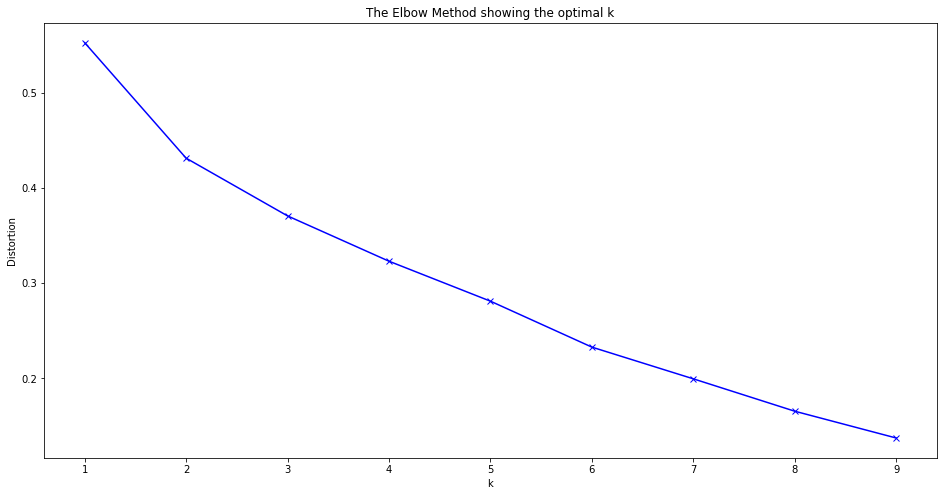

In [239]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [240]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kadikoy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [241]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kadikoy_merged = kadikoy_data2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kadikoy_merged = kadikoy_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='SEMT_ADI_BUYUK')

kadikoy_merged # check the last columns!

,ILCE,SEMT_ADI_BUYUK,POSTA_KODU,LATITUDE,LONGITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,KADIKÖY,CAFERAĞA,34710,40.985040,29.024810,0,Café,Coffee Shop,Pizza Place,Theater,Restaurant,Bar,Chocolate Shop,Dessert Shop,Ice Cream Shop,Music Store
1,KADIKÖY,OSMANAĞA,34714,40.980518,29.108685,1,Restaurant,Café,Bakery,Turkish Restaurant,Ice Cream Shop,Comfort Food Restaurant,Steakhouse,Italian Restaurant,Doner Restaurant,Auto Dealership
2,KADIKÖY,RASİMPAŞA,34716,40.997027,29.026541,0,Café,Coffee Shop,Breakfast Spot,Kebab Restaurant,Seafood Restaurant,Food Truck,Burger Joint,Sporting Goods Shop,Cosmetics Shop,Bookstore
3,KADIKÖY,KOŞUYOLU,34718,41.006634,29.034012,1,Café,Park,Hookah Bar,Gym,Restaurant,Breakfast Spot,Turkish Restaurant,Coffee Shop,Burger Joint,Electronics Store
4,KADIKÖY,FİKİRTEPE,34720,40.994142,29.051333,1,Fast Food Restaurant,Restaurant,Park,Theater,Bakery,Comedy Club,Soccer Field,Pastry Shop,Moving Target,Business Service
5,KADIKÖY,EĞİTİM,34722,40.989033,29.049089,1,Café,Grocery Store,Coffee Shop,Cigkofte Place,Restaurant,Park,College Theater,Big Box Store,Flower Shop,Soup Place
6,KADIKÖY,FENERYOLU,34724,40.978715,29.049059,1,Café,Gym,Seafood Restaurant,Dance Studio,Restaurant,Kebab Restaurant,Pide Place,Department Store,Nightclub,Fast Food Restaurant
7,KADIKÖY,FENERBAHÇE,34726,40.973433,29.043091,1,Café,Restaurant,Seafood Restaurant,Coffee Shop,Dessert Shop,Gym / Fitness Center,Steakhouse,Kebab Restaurant,Pub,Pool
8,KADIKÖY,CADDEBOSTAN,34728,40.967019,29.062925,1,Coffee Shop,Café,Ice Cream Shop,Seafood Restaurant,Restaurant,Nightclub,Italian Restaurant,Chocolate Shop,Pub,Cosmetics Shop
9,KADIKÖY,GÖZTEPE,34730,40.976940,29.062500,1,Park,Turkish Restaurant,Café,Bakery,Ice Cream Shop,Kebab Restaurant,Dessert Shop,Paper / Office Supplies Store,Farmers Market,Fish Market


In [242]:
kadikoy_merged.shape

(17, 16)

In [243]:
kadikoy_map2 = folium.Map(location=[latitude, longitude], zoom_start = 12.4)

# add markers to map
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kadikoy_merged['LATITUDE'], kadikoy_merged['LONGITUDE'], kadikoy_merged['SEMT_ADI_BUYUK'], kadikoy_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(kadikoy_map2)
       
kadikoy_map2


In [244]:

for lat, lng, borough, park in zip(kadikoy_data['Latitude'], kadikoy_data['Longitude'], kadikoy_data['Ilce'], kadikoy_data['ParkAdi']):
    label = '{}, {}'.format(park, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(kadikoy_map2)  
    
kadikoy_map2

In [245]:
kadikoy_merged.loc[kadikoy_merged['Cluster Labels'] == 0, kadikoy_merged.columns[[1] + list(range(5, kadikoy_merged.shape[1]))]]

,SEMT_ADI_BUYUK,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CAFERAĞA,0,Café,Coffee Shop,Pizza Place,Theater,Restaurant,Bar,Chocolate Shop,Dessert Shop,Ice Cream Shop,Music Store
2,RASİMPAŞA,0,Café,Coffee Shop,Breakfast Spot,Kebab Restaurant,Seafood Restaurant,Food Truck,Burger Joint,Sporting Goods Shop,Cosmetics Shop,Bookstore
16,BOSTANCI,0,Café,Dessert Shop,Bakery,Pet Store,Pastry Shop,Meyhane,Gym / Fitness Center,Ice Cream Shop,Turkish Home Cooking Restaurant,Breakfast Spot


In [246]:
kadikoy_merged.loc[kadikoy_merged['Cluster Labels'] == 1, kadikoy_merged.columns[[1] + list(range(5, kadikoy_merged.shape[1]))]]

,SEMT_ADI_BUYUK,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,OSMANAĞA,1,Restaurant,Café,Bakery,Turkish Restaurant,Ice Cream Shop,Comfort Food Restaurant,Steakhouse,Italian Restaurant,Doner Restaurant,Auto Dealership
3,KOŞUYOLU,1,Café,Park,Hookah Bar,Gym,Restaurant,Breakfast Spot,Turkish Restaurant,Coffee Shop,Burger Joint,Electronics Store
4,FİKİRTEPE,1,Fast Food Restaurant,Restaurant,Park,Theater,Bakery,Comedy Club,Soccer Field,Pastry Shop,Moving Target,Business Service
5,EĞİTİM,1,Café,Grocery Store,Coffee Shop,Cigkofte Place,Restaurant,Park,College Theater,Big Box Store,Flower Shop,Soup Place
6,FENERYOLU,1,Café,Gym,Seafood Restaurant,Dance Studio,Restaurant,Kebab Restaurant,Pide Place,Department Store,Nightclub,Fast Food Restaurant
7,FENERBAHÇE,1,Café,Restaurant,Seafood Restaurant,Coffee Shop,Dessert Shop,Gym / Fitness Center,Steakhouse,Kebab Restaurant,Pub,Pool
8,CADDEBOSTAN,1,Coffee Shop,Café,Ice Cream Shop,Seafood Restaurant,Restaurant,Nightclub,Italian Restaurant,Chocolate Shop,Pub,Cosmetics Shop
9,GÖZTEPE,1,Park,Turkish Restaurant,Café,Bakery,Ice Cream Shop,Kebab Restaurant,Dessert Shop,Paper / Office Supplies Store,Farmers Market,Fish Market
10,MERDİVENKÖY,1,Café,Turkish Restaurant,Park,Bakery,Electronics Store,Gym / Fitness Center,Restaurant,Spa,Food,Breakfast Spot
11,SAHRAYICEDİT,1,Café,Bakery,Ice Cream Shop,Park,Turkish Restaurant,Restaurant,Seafood Restaurant,Convenience Store,Food & Drink Shop,Lounge
